# Final result ( part 4)



                                                                                     
#### This script has used lst.npy, features.npy, data11.npy files to find the duplicates.

In [0]:
#import all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time
import re
from IPython.display import Image, display
from sklearn.metrics import pairwise_distances

In [0]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
import tensorflow as tf
import keras
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
keras.backend.set_session(sess)

In [0]:
data11 = pd.read_csv('data11.csv')

In [0]:
lst = np.load('lst.npy')

In [0]:
pd.DataFrame(lst).head(2)

,0
0,TOPEGJZZGJRFECSY
1,TOPEM4ZFTCGSZMVV


In [0]:
df_asins = list(data11['productId'])

In [0]:
listout = df_asins

#### I have converted image features file datatype from float64 to float16 to reduce the size and save it as float16.npy

features.npy --> 22.7 GB ( float64)
float16.npy ---> 5.7  GB ( float32)

I want to caluate similarity matrix pairwise but it size will become (346205 * 346205). It is unable to fit n my RAM. So I have tried one image vs all image comparision, even this is not efficent. I can improve it by calculating only upper tringular values(similarity matrix) 

In [0]:
features = np.load('float16.npy')

In [0]:
# NOT ENOUGH MEMORY( Memory Error)
#dist_out = pairwise_distances(features, metric="euclidean", n_jobs = -1 ) 

http://na-o-ys.github.io/others/2015-11-07-sparse-vector-similarities.html

#### Convert numpy file of downloaded images productid into list

In [0]:
lst1 = lst.tolist()

In [0]:
prouctidlist = lst1

In [0]:
features_train = features

######  I have used only image features to find out duplicates. I can do following improvements.
1. Concatenate text features corresponding image feature and make one hybrid feeatur vector and then apply similarity algorithm.
2. concatenate text features ,image features and other features like productbrand, category, size etc and make one hybrid features for finding duplicates based on simmilarity.


### The following code will generate the result file same like sample.txt

###### I have used to directly print like sample.txt. 
###### But it can be done by creating dictionary and dumps into json and write json file to txt.

In [0]:
f = open('workfile.txt','w')

In [0]:
f.write(" {")
f.write("\n")

1

In [0]:

#get similar products using CNN features (VGG-16)
def get_similar_products_cnn(num_results):
    for iid in listout: 
        pId = iid
        doc_id = prouctidlist.index(pId)
        pairwise_dist = pairwise_distances(features_train,features_train[doc_id].reshape(1,-1),n_jobs= -1)

        indices = np.argsort(pairwise_dist.flatten())[0:num_results]
        pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
        f.write('     "'+ pId +'" : [' )
        count = 1
        for i in range(len(indices)):
            rows = data11[['productId','imageUrlStr','title']].loc[data11['productId']==prouctidlist[indices[i]]]
            for indx, row in rows.iterrows():
                if row['productId']!= pId:
                    if pdists[i]<= 0.2:
                        if count == 1:
                            f.write('["'+ row['productId']+ '"]')
                            count = 0
                        else:
                            f.write(',["'+ row['productId']+ '"]')
                    display(Image(filename ='images/' + row['productId']+ '.jpeg' ))
                    print('Product Title: ', row['title'], row['productId'])
                    print('Euclidean Distance from input image:', pdists[i])
        f.write("],")            
        f.write("\n")


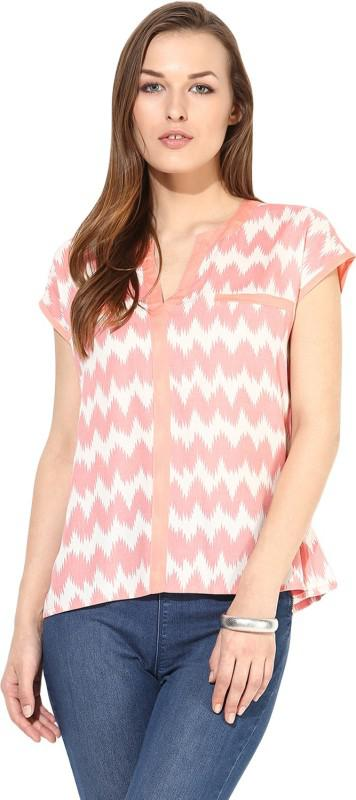

Product Title:  Citrine Casual Short Sleeve Printed Women's Pink, White Top TOPE9ABBPDAN7VCH
Euclidean Distance from input image: 0.0


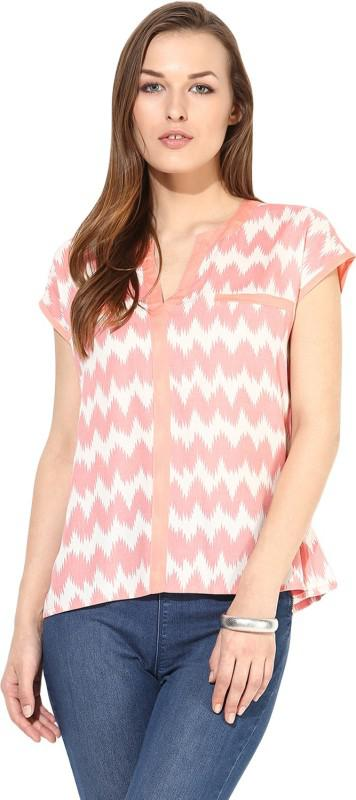

Product Title:  Citrine Casual Short Sleeve Printed Women's Pink, White Top TOPE9ABBBTJYDSQE
Euclidean Distance from input image: 0.0


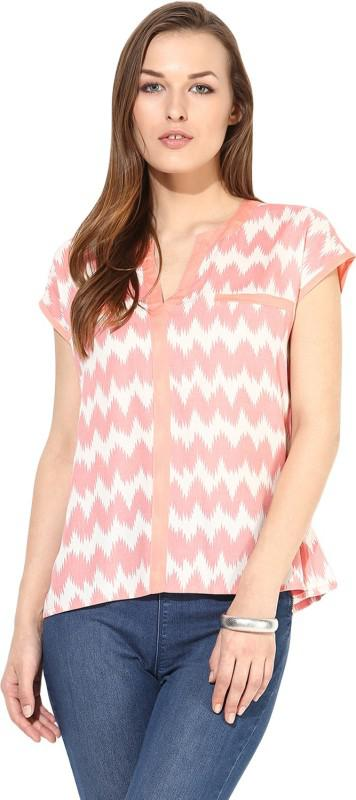

Product Title:  Citrine Casual Short Sleeve Printed Women's Pink, White Top TOPE9ABBHJ8HGGGK
Euclidean Distance from input image: 0.0


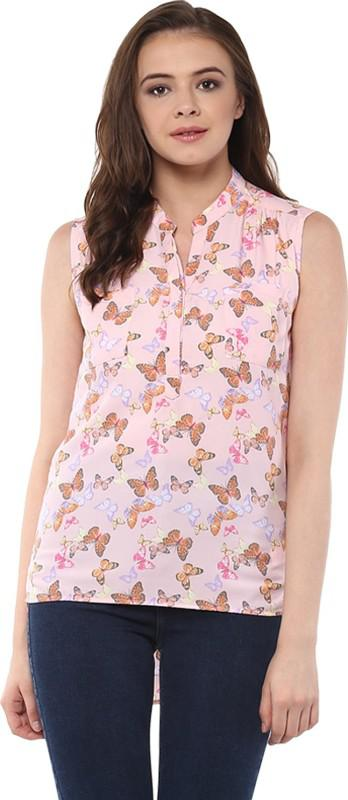

Product Title:  Harpa Casual Sleeveless Printed Women's Pink Top TOPEH7SUEPPW65ZQ
Euclidean Distance from input image: 749.150584877819


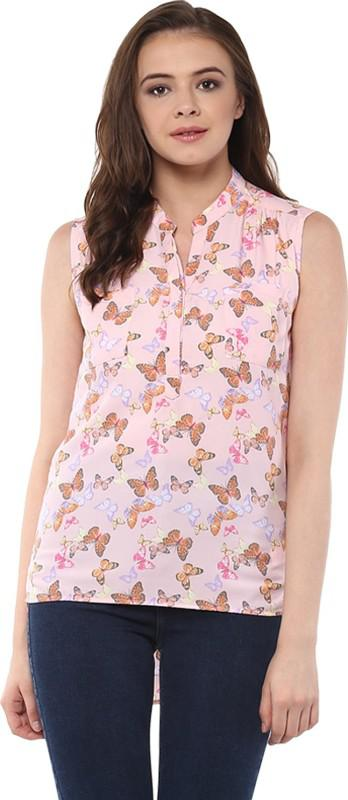

Product Title:  Harpa Casual Sleeveless Printed Women's Pink Top TOPEH7T36GEK6WUH
Euclidean Distance from input image: 749.150584877819


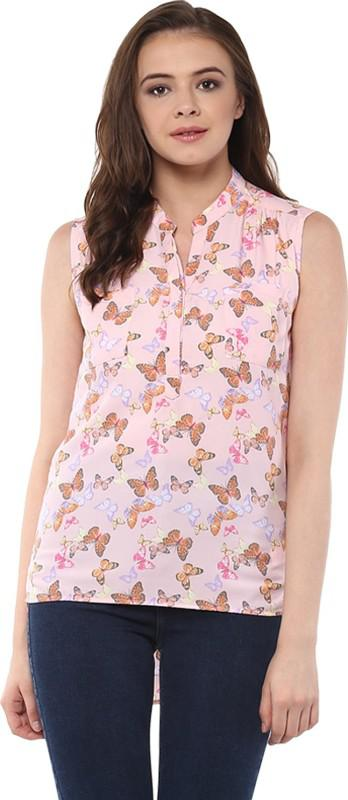

Product Title:  Harpa Casual Sleeveless Printed Women's Pink Top TOPEH7T3HEW87TKF
Euclidean Distance from input image: 749.150584877819


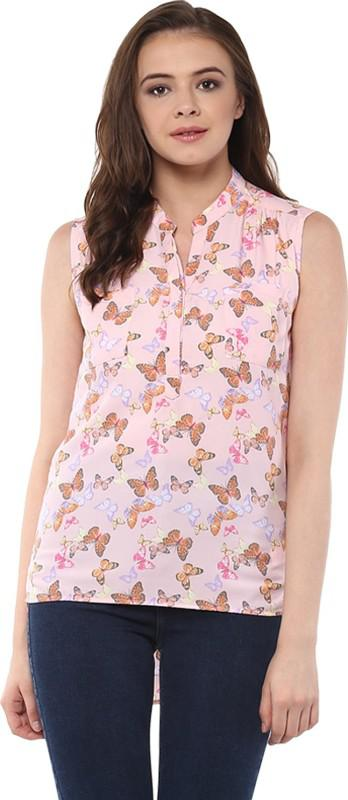

Product Title:  Harpa Casual Sleeveless Printed Women's Pink Top TOPEH7SUSZUA8PQA
Euclidean Distance from input image: 749.150584877819


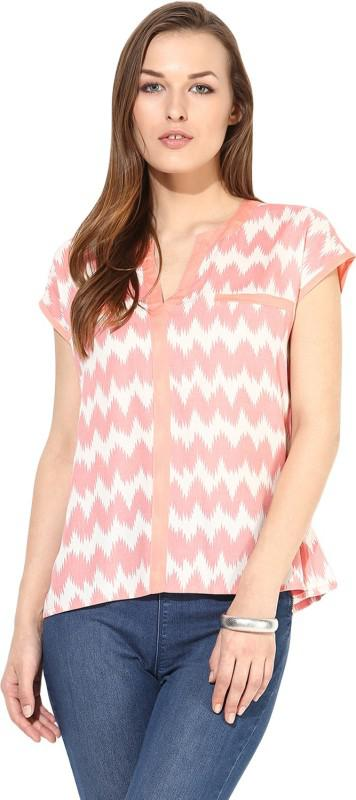

Product Title:  Citrine Casual Short Sleeve Printed Women's Pink, White Top TOPE9ABBPDAN7VCH
Euclidean Distance from input image: 0.0


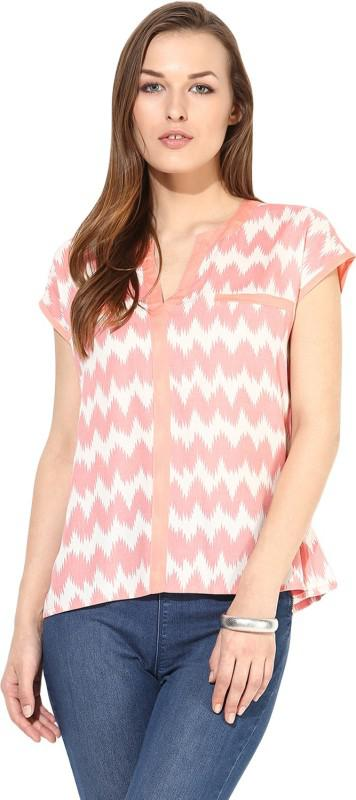

Product Title:  Citrine Casual Short Sleeve Printed Women's Pink, White Top TOPE9ABBHJ8HGGGK
Euclidean Distance from input image: 0.0


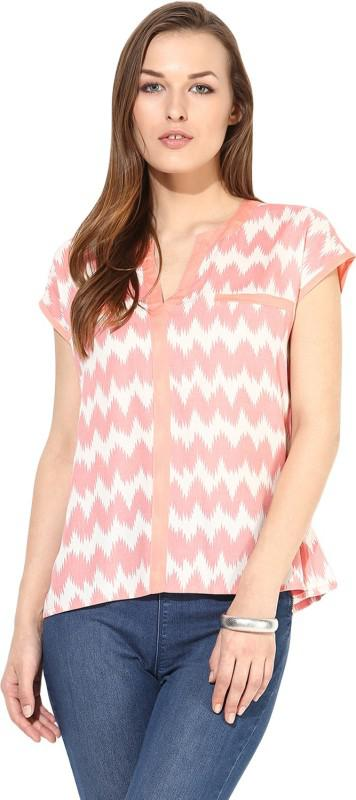

Product Title:  Citrine Casual Short Sleeve Printed Women's Pink, White Top TOPE9ABBZU3HZRHN
Euclidean Distance from input image: 0.0


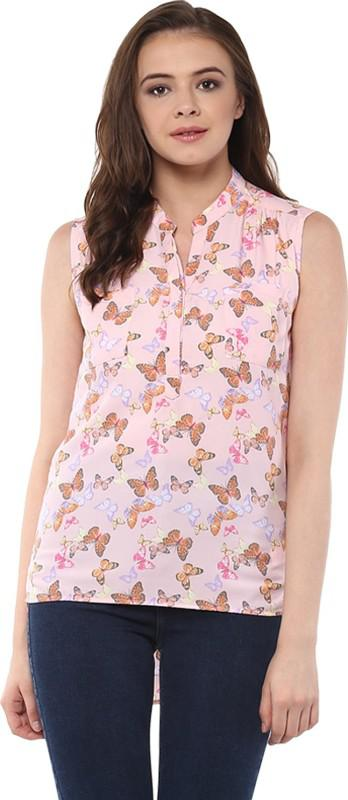

Product Title:  Harpa Casual Sleeveless Printed Women's Pink Top TOPEH7SUEPPW65ZQ
Euclidean Distance from input image: 749.150584877819


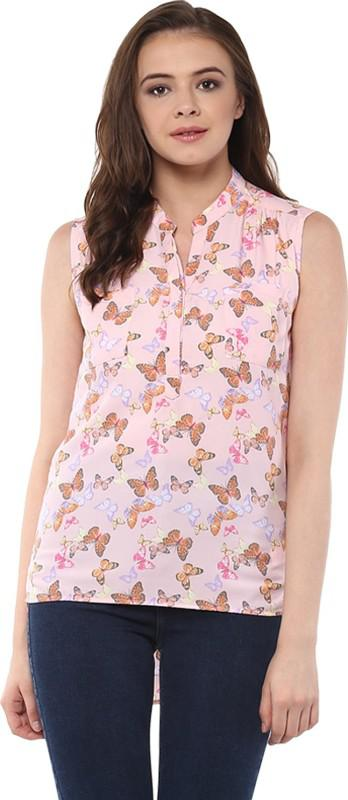

Product Title:  Harpa Casual Sleeveless Printed Women's Pink Top TOPEH7T36GEK6WUH
Euclidean Distance from input image: 749.150584877819


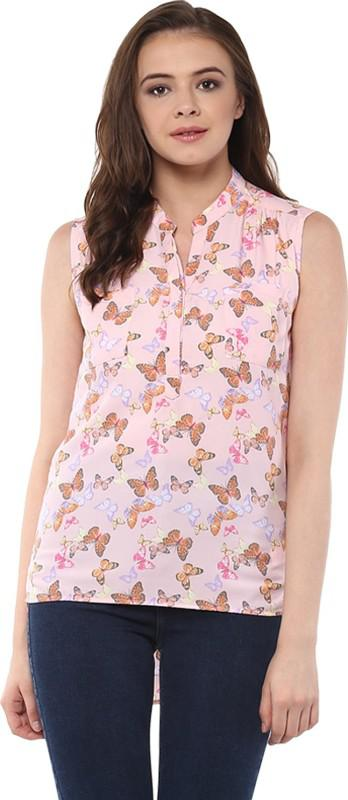

Product Title:  Harpa Casual Sleeveless Printed Women's Pink Top TOPEH7T3HEW87TKF
Euclidean Distance from input image: 749.150584877819


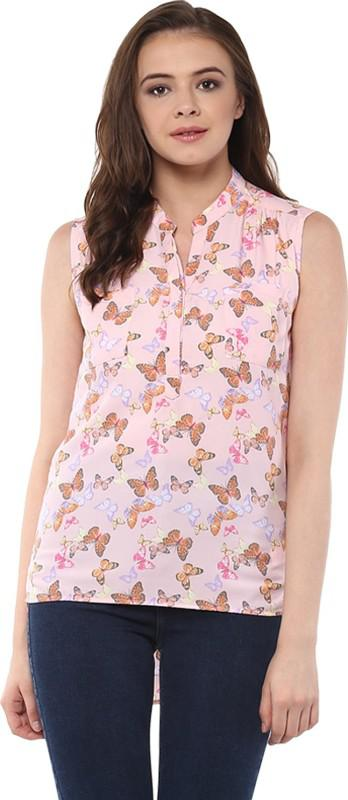

Product Title:  Harpa Casual Sleeveless Printed Women's Pink Top TOPEH7SUSZUA8PQA
Euclidean Distance from input image: 749.150584877819


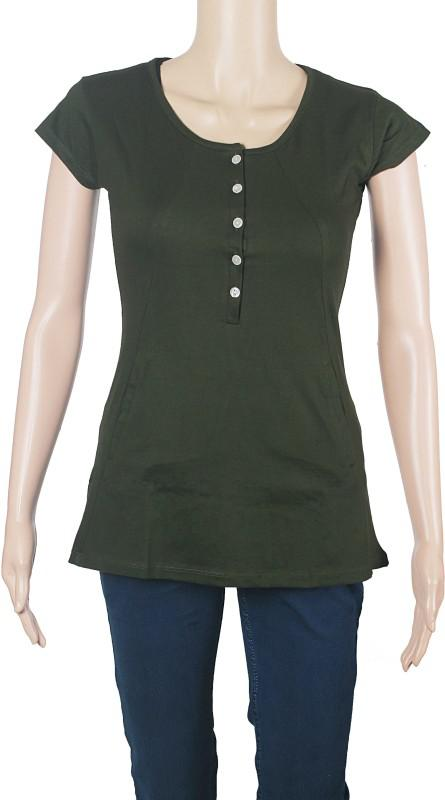

Product Title:  Leelan Casual Short Sleeve Solid Women's Dark Green Top TOPE9AZPDMGTYHKR
Euclidean Distance from input image: 586.1551746803117


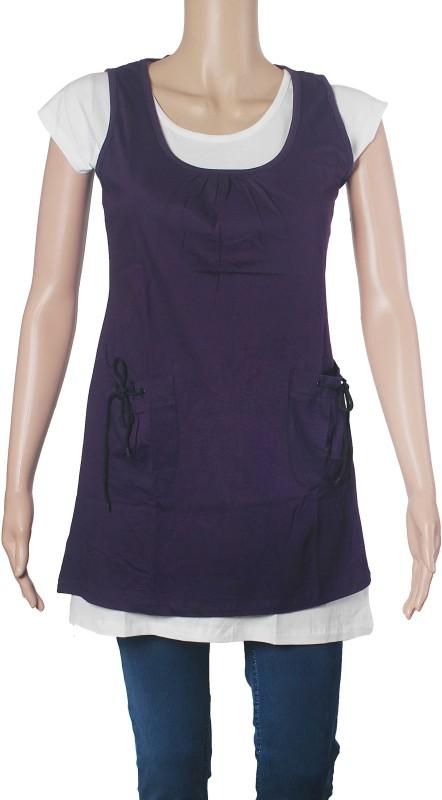

Product Title:  Leelan Casual Short Sleeve Solid Women's Purple Top TOPE9AZPCWHWV4EF
Euclidean Distance from input image: 661.7615014046345


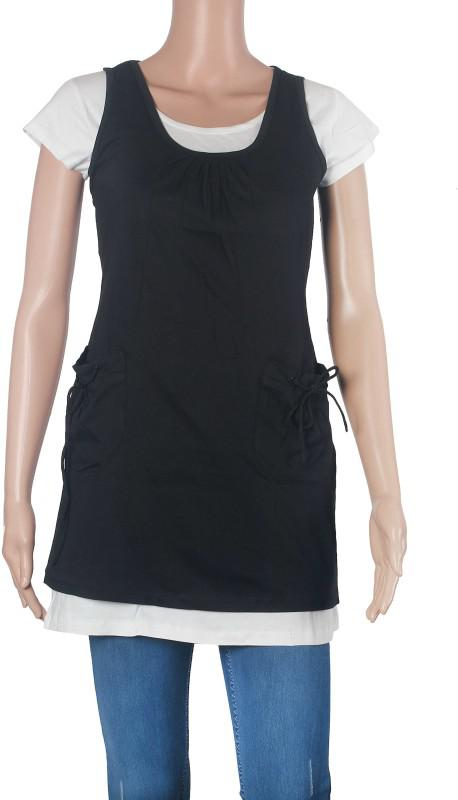

Product Title:  Leelan Casual Short Sleeve Solid Women's Black Top TOPE9AZPZT5EFN5G
Euclidean Distance from input image: 720.1761735812001


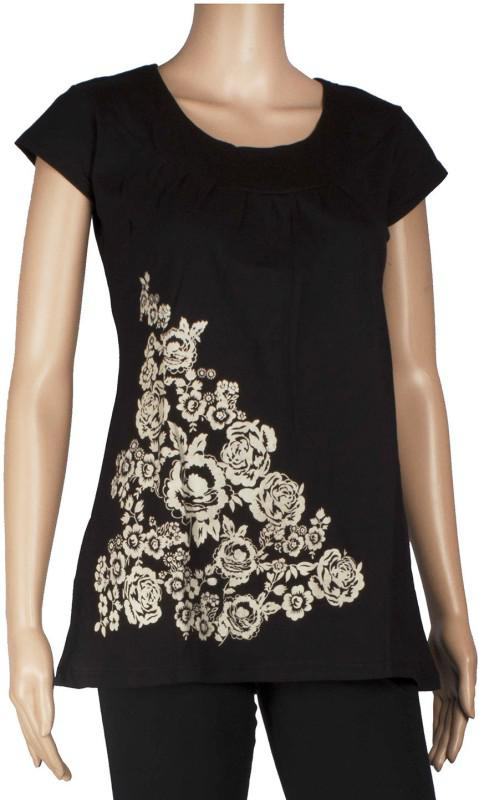

Product Title:  Leelan Casual Short Sleeve Floral Print Women's Black Top TOPE7NV9ZZ4HVH3D
Euclidean Distance from input image: 725.6259918976124


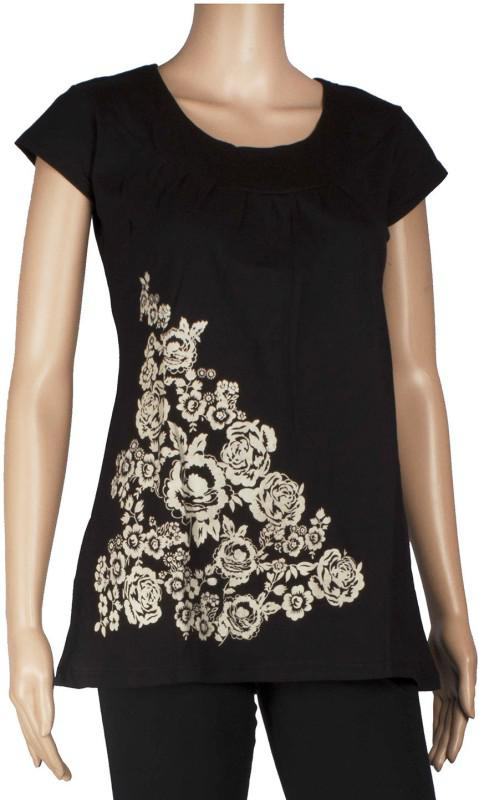

Product Title:  Leelan Casual Short Sleeve Floral Print Women's Black Top TOPE7NV9MRRPFYMF
Euclidean Distance from input image: 725.6259918976124


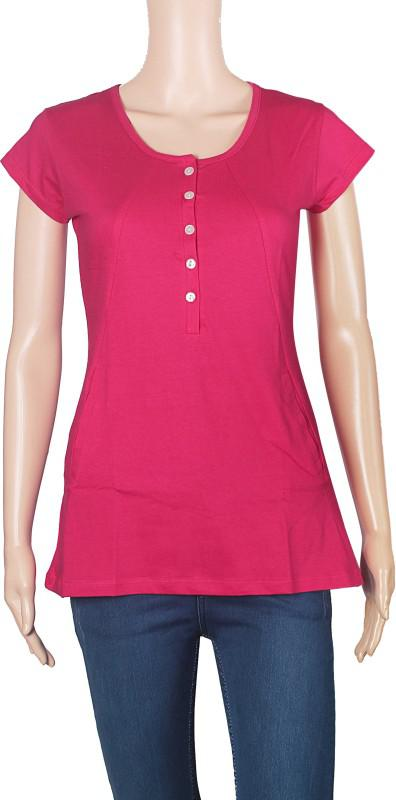

Product Title:  Leelan Casual Short Sleeve Solid Women's Pink Top TOPE9AZPGGQ32HWG
Euclidean Distance from input image: 735.8950409442002


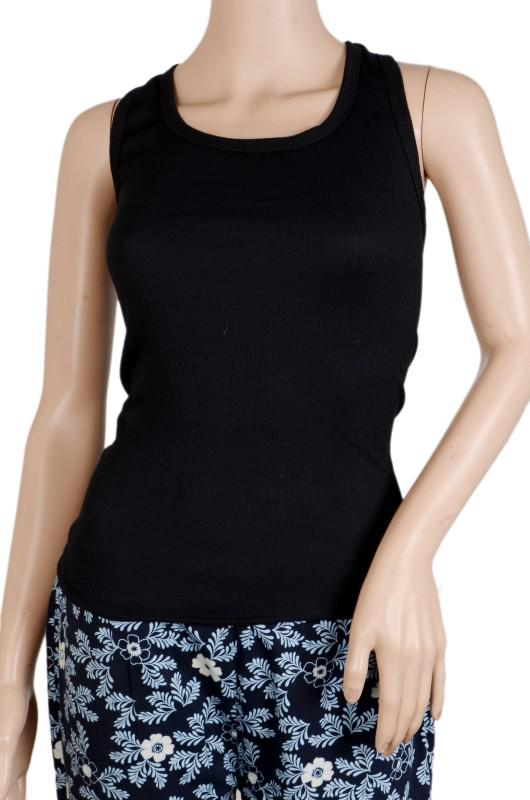

Product Title:  Moh Maya Casual Sleeveless Solid Women's Black Top TOPEF272PPMTPGJF
Euclidean Distance from input image: 763.5993098853874


Process ForkPoolWorker-327:
Process ForkPoolWorker-324:
Process ForkPoolWorker-360:
Process ForkPoolWorker-341:
Process ForkPoolWorker-332:
Process ForkPoolWorker-333:
Process ForkPoolWorker-340:
Process ForkPoolWorker-322:
Process ForkPoolWorker-343:
Process ForkPoolWorker-323:
Process ForkPoolWorker-331:
Process ForkPoolWorker-346:
Process ForkPoolWorker-337:
Process ForkPoolWorker-350:
Process ForkPoolWorker-338:
Process ForkPoolWorker-344:
Process ForkPoolWorker-321:
Process ForkPoolWorker-348:
Process ForkPoolWorker-339:
Process ForkPoolWorker-351:
Process ForkPoolWorker-334:
Process ForkPoolWorker-353:
Process ForkPoolWorker-342:
Process ForkPoolWorker-329:
Process ForkPoolWorker-335:
Process ForkPoolWorker-352:
Process ForkPoolWorker-349:
Process ForkPoolWorker-347:
Process ForkPoolWorker-330:
Process ForkPoolWorker-336:
Process ForkPoolWorker-326:
Process ForkPoolWorker-328:
Process ForkPoolWorker-325:
Process ForkPoolWorker-345:
Traceback (most recent call last):
Traceback (mo

  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._ta

KeyboardInterrupt
  File "/home/coea/.local/lib/python3.5/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/home/coea/.local/lib/python3.5/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 250, in recv
    buf = self._recv_bytes()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
Process ForkPoolWorker-354:
  File "/home/coea/.local/lib/python3.5/site-packages/sklearn/externals/joblib/pool.py", line 360, in get
    racquire()
Process ForkPoolWorker-359:
Process ForkPoolWorker-355:
Traceback (most

KeyboardInterrupt: 

In [0]:
get_similar_products_cnn(8)

In [0]:
f.write(" }")
f.write("\n")
f.close()